In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
!pip install peft transformers -q

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deberta-v3-base-for-llm-comp/deberta-v3-base-local/rust_model.ot
/kaggle/input/deberta-v3-base-for-llm-comp/deberta-v3-base-local/spm.model
/kaggle/input/deberta-v3-base-for-llm-comp/deberta-v3-base-local/config.json
/kaggle/input/deberta-v3-base-for-llm-comp/deberta-v3-base-local/README.md
/kaggle/input/deberta-v3-base-for-llm-comp/deberta-v3-base-local/tf_model.h5
/kaggle/input/deberta-v3-base-for-llm-comp/deberta-v3-base-local/tokenizer_config.json
/kaggle/input/deberta-v3-base-for-llm-comp/deberta-v3-base-local/pytorch_model.bin
/kaggle/input/deberta-v3-base-for-llm-comp/deberta-v3-base-local/.gitattributes
/kaggle/input/deberta-v3-base-for-llm-comp/deberta-v3-base-local/.cache/huggingface/.gitignore
/kaggle/input/deberta-v3-base-for-llm-comp/deberta-v3-base-local/.cache/huggingface/download/tokenizer_config.json.metadata
/kaggle/input/deberta-v3-base-for-llm-comp/deberta-v3-base-local/.cache/huggingface/download/tf_model.h5.metadata
/kaggle/input/deberta-v3-base-for-

In [2]:
# import the data
training = pd.read_csv('/kaggle/input/llm-classification-finetuning/train.csv')
test = pd.read_csv('/kaggle/input/llm-classification-finetuning/test.csv')

training['train_test'] = 1
test['train_test'] = 0
all_data = pd.concat([training,test])

print("Import Data Complete")

Import Data Complete


In [3]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57477 entries, 0 to 57476
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              57477 non-null  int64 
 1   model_a         57477 non-null  object
 2   model_b         57477 non-null  object
 3   prompt          57477 non-null  object
 4   response_a      57477 non-null  object
 5   response_b      57477 non-null  object
 6   winner_model_a  57477 non-null  int64 
 7   winner_model_b  57477 non-null  int64 
 8   winner_tie      57477 non-null  int64 
 9   train_test      57477 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 4.4+ MB


In [4]:
training.head(10)

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,train_test
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0,1
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0,1
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1,1
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0,1
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0,1
5,292873,vicuna-13b,gpt-4-0314,"[""Construct a rap battle, in the style of Epic...","[""[Zeus]\nYo, it's the king of the gods on the...","[""(Verse 1 - Zeus)\n\nI'm the king of the gods...",0,1,0,1
6,313413,mixtral-8x7b-instruct-v0.1,vicuna-13b,"[""Why water is not used in bath tub?""]","[""Water is actually used in a bath tub. A bath...","[""Water is not used in a bath tub because it i...",1,0,0,1
7,370945,gemini-pro,claude-2.0,"[""\""Bacteria is life on Mars but a heartbeat i...","[""Dune""]","[""This quote seems to be referencing the debat...",0,1,0,1
8,441448,gpt-3.5-turbo-0613,vicuna-13b,"[""translate to russian the followig sentence ...","[""\u0411\u043e\u043b\u044c\u0448\u0438\u0435 \...","[""\u0411\u043e\u043b\u044c\u0448\u0438\u0435 \...",0,1,0,1
9,481524,gpt-4-0314,gpt-3.5-turbo-0613,"[""From now, you *always* have to talk as if yo...","[""Hewwo! OwO I'm an AI assistant, here to hewp...","[""Hewwo! I'm your new helpful assistant, owo! ...",0,1,0,1


In [5]:
training.tail(10)

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,train_test
57467,4294254797,gpt-4-1106-preview,claude-2.0,"[""can you provide a modular python code that w...","[""Certainly! Below is a modular Python example...","[""Here is a modular Python code to format SQL ...",1,0,0,1
57468,4294349169,palm-2,guanaco-33b,"[""Schreibe ein Bewerbungsanschreiben in deutsc...","[""I am trained to understand and respond only ...","[""Here is a possible Bewerbungsanschreiben in ...",0,1,0,1
57469,4294452769,gpt-4-1106-preview,openchat-3.5,"[""Old McDonald harvested 4 pumpkins this year....","[""Old McDonald originally harvested 4 pumpkins...","[""Old McDonald had 4 pumpkins initially and no...",0,0,1,1
57470,4294602932,claude-2.1,gpt-4-1106-preview,"[""I want you to act like {character} from {ser...","[""*responds in character's voice* Well hello t...","[""Of course! However, you'll need to specify w...",0,1,0,1
57471,4294633312,pplx-7b-online,gpt-4-0613,"[""abc""]","[""It seems like you're referring to the Califo...","[""Hello! It seems like you've typed \""abc.\"" H...",1,0,0,1
57472,4294656694,gpt-4-0613,claude-1,"[""A simple mnemonic for \u03c0:\n\""How I wish ...","[""Sure, let's break it down:\n\n1. \""How\"" has...","[""Here is how that mnemonic represents the dig...",1,0,0,1
57473,4294692063,claude-2.0,llama-2-13b-chat,"[""In python, implement a naive Bayes with gaus...","[""Here is an implementation of a naive Bayes c...","[""Sure! Here's an implementation of a naive Ba...",1,0,0,1
57474,4294710549,claude-1,alpaca-13b,"[""is it unethical to work on building weapons?...","[""Working on weapons technology raises some et...","[""It depends on the context. Weapons can be us...",1,0,0,1
57475,4294899228,palm-2,tulu-2-dpo-70b,"[""If a bait contains 0,0025% bromadiolon then ...","[""Bromadiolone is a rodenticide which is most ...","[""As an AI language model, I do not promote or...",0,1,0,1
57476,4294947231,gemini-pro-dev-api,gpt-4-1106-preview,"[""three kids eat three apples in three days, h...","[""27 apples""]","[""If three kids eat three apples in three days...",1,0,0,1


In [6]:
#check for duplicate id's
total_id = len(training["id"])
total_unique_id = len(training["id"].unique())

print("Total number of 'id' duplicates:")
print(total_id - total_unique_id)

Total number of 'id' duplicates:
0


In [7]:
#check for null or empty cells
nan_count = training.isna().sum().sum()
null_count = training.isnull().sum().sum()

print('Number of NaN values:', nan_count)
print('Number of null values:', null_count)

Number of NaN values: 0
Number of null values: 0


In [8]:
#check for consistency of model_a, model_b and LLMs identification
total_unique_model_a = len(training["model_a"].unique())
total_unique_model_b = len(training["model_b"].unique())

print("Total number of 'model_a' and 'model_b' unique values:")
print('model_a =', total_unique_model_a)
print('model_b =', total_unique_model_b)

LLM_a = training["model_a"].unique()
LLM_b = training["model_b"].unique()
LLM = list(set(LLM_a).intersection(set(LLM_b)))

print("total number of LLMs =", len(LLM))
print('LLMs utilized:', LLM)

Total number of 'model_a' and 'model_b' unique values:
model_a = 64
model_b = 64
total number of LLMs = 64
LLMs utilized: ['openchat-3.5-0106', 'vicuna-33b', 'chatglm-6b', 'qwen1.5-72b-chat', 'codellama-34b-instruct', 'dolly-v2-12b', 'dolphin-2.2.1-mistral-7b', 'pplx-70b-online', 'llama-13b', 'vicuna-13b', 'zephyr-7b-beta', 'openchat-3.5', 'mistral-medium', 'qwen-14b-chat', 'oasst-pythia-12b', 'gemini-pro-dev-api', 'wizardlm-13b', 'nous-hermes-2-mixtral-8x7b-dpo', 'stablelm-tuned-alpha-7b', 'koala-13b', 'claude-instant-1', 'gpt-3.5-turbo-0125', 'claude-1', 'solar-10.7b-instruct-v1.0', 'alpaca-13b', 'tulu-2-dpo-70b', 'gpt-4-0314', 'chatglm3-6b', 'gemini-pro', 'mistral-7b-instruct-v0.2', 'gpt-3.5-turbo-1106', 'claude-2.1', 'claude-2.0', 'zephyr-7b-alpha', 'llama2-70b-steerlm-chat', 'chatglm2-6b', 'qwen1.5-4b-chat', 'RWKV-4-Raven-14B', 'mpt-7b-chat', 'fastchat-t5-3b', 'openhermes-2.5-mistral-7b', 'llama-2-70b-chat', 'gpt-4-0613', 'guanaco-33b', 'palm-2', 'gpt-3.5-turbo-0613', 'gpt-3.5-tur

In [9]:
#check for duplicate prompts -  the same prompt could have been given to more than two different LLMs
total_prompt = len(training["prompt"])
total_unique_prompt = len(training["prompt"].unique())

print("Total number of 'prompt' duplicates:")
print(total_prompt - total_unique_prompt)

#There are 57477 observations and 5743 prompt duplicates without id duplicates -> having prompt duplicates are ok to have 
#and no further data cleaning is needed to deal with prompt duplicates

Total number of 'prompt' duplicates:
5743


In [10]:
import re
import nltk
from nltk.corpus import stopwords
#clean cells with text data
def preprocess_text(text):
    #convert text to lower case
    text = text.lower()
    #remove digits and special characters using regular expressions
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    #tokenize the text
    text = nltk.word_tokenize(text)
    
    return text

def remove_stopwords(text):
    #remove stopwords
    stop_words = set(stopwords.words('english'))
    text_no_stopwords = [word for word in text if word not in stop_words]

    return text_no_stopwords


def lemmatization(text):
    lemmatizer = nltk.WordNetLemmatizer()
    lemmatizer_text = [lemmatizer.lemmatize(text) for text in text]

    return lemmatizer_text


def clean_text(text):
    #convert text to lower case, remove digits and special characters using regular expressions and remove stopwords combined together
    text = preprocess_text(text)
    filtered_text = remove_stopwords(text)
    lemmatizer_text = lemmatization(filtered_text)
    clean_text = ' '.join(lemmatizer_text)

    return clean_text

training["prompt"] = training["prompt"].apply(clean_text)
training["response_a"] = training["response_a"].apply(clean_text)
training["response_b"] = training["response_b"].apply(clean_text)


print("Clean Cells with Text Data Complete")

Clean Cells with Text Data Complete


model a: model_a
gpt-4-1106-preview          3678
gpt-3.5-turbo-0613          3553
gpt-4-0613                  3099
claude-2.1                  2859
gpt-4-0314                  2087
                            ... 
falcon-180b-chat             145
openchat-3.5-0106            108
qwen1.5-7b-chat              106
qwen1.5-4b-chat              100
mistral-7b-instruct-v0.2      54
Name: count, Length: 64, dtype: int64
-----
Matplotlib barchart, model a:


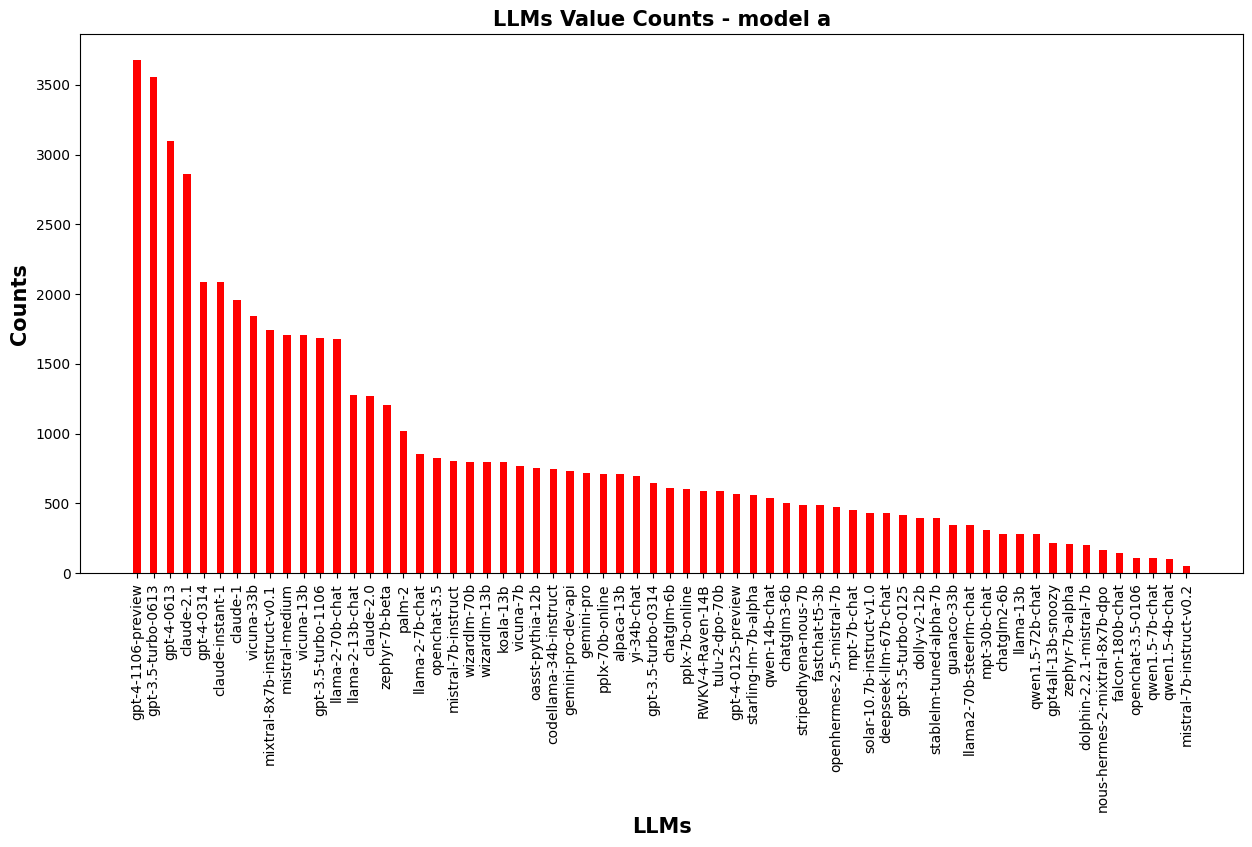

In [11]:
import matplotlib.pyplot as plt

#barchart - model a
result_model_a = training["model_a"].value_counts()
print("model a:", result_model_a)

## Matplotlib barchart:
print("-----")
print("Matplotlib barchart, model a:")
  
barWidth = 0.45
plt.figure(figsize=(15, 7))

plt.bar(result_model_a.index, result_model_a.values, barWidth, color='r')

plt.ylabel('Counts', fontweight ='bold', fontsize = 15)
plt.xlabel('LLMs', fontweight ='bold', fontsize = 15)

plt.xticks(rotation=90)
plt.title('LLMs Value Counts - model a', fontweight ='bold', fontsize = 15)


plt.show()

model b: model_b
gpt-4-1106-preview          3709
gpt-3.5-turbo-0613          3530
gpt-4-0613                  3066
claude-2.1                  2724
claude-instant-1            2051
                            ... 
falcon-180b-chat             141
openchat-3.5-0106            136
qwen1.5-7b-chat              102
qwen1.5-4b-chat              100
mistral-7b-instruct-v0.2      46
Name: count, Length: 64, dtype: int64
-----
Matplotlib barchart, model b:


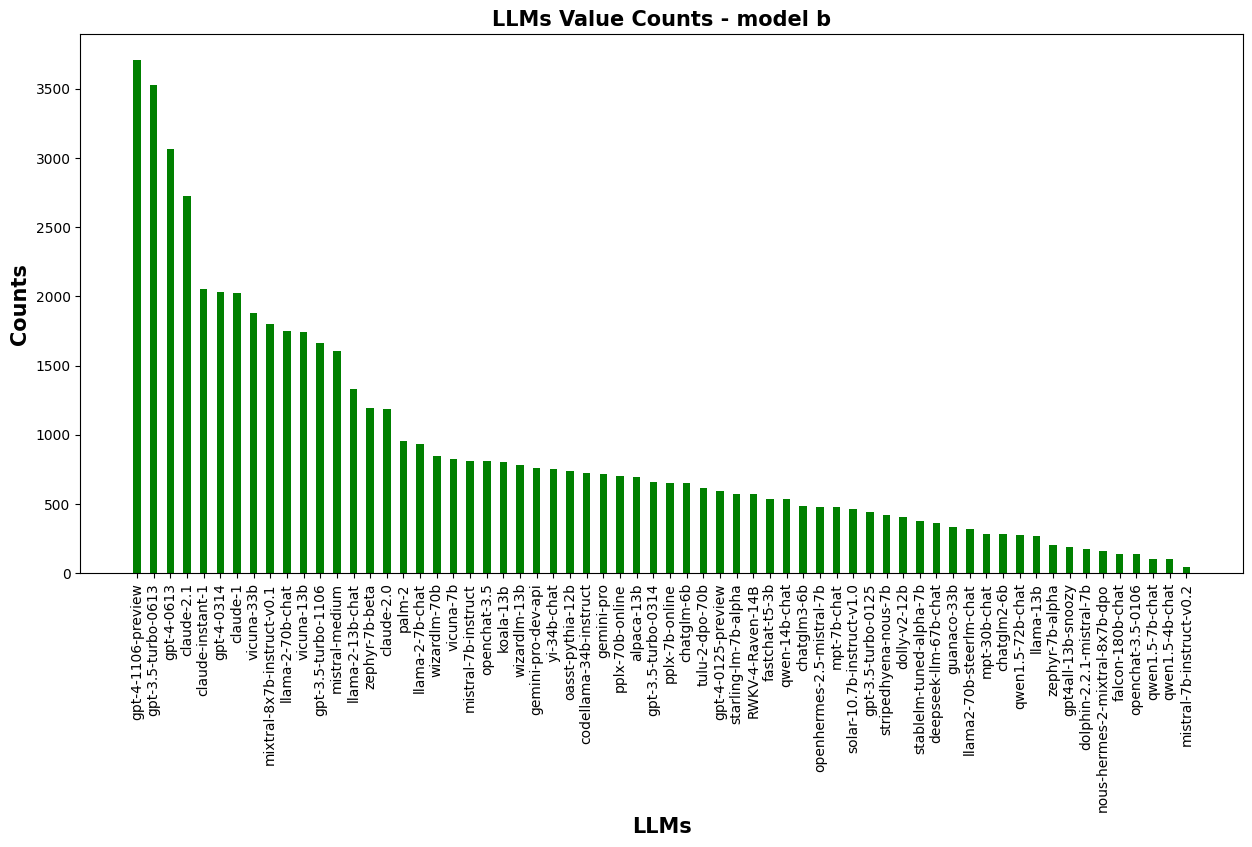

In [12]:
#barchart - model b
result_model_b = training["model_b"].value_counts()
print("model b:", result_model_b)

## Matplotlib barchart:
print("-----")
print("Matplotlib barchart, model b:")
  
barWidth = 0.45
plt.figure(figsize=(15, 7))

plt.bar(result_model_b.index, result_model_b.values, barWidth, color='g')

plt.ylabel('Counts', fontweight ='bold', fontsize = 15)
plt.xlabel('LLMs', fontweight ='bold', fontsize = 15)

plt.xticks(rotation=90)
plt.title('LLMs Value Counts - model b', fontweight ='bold', fontsize = 15)


plt.show()

model winner: winner_model
model a       20064
model b       19652
winner tie    17761
Name: count, dtype: int64
-----
Matplotlib barchart, model winner:


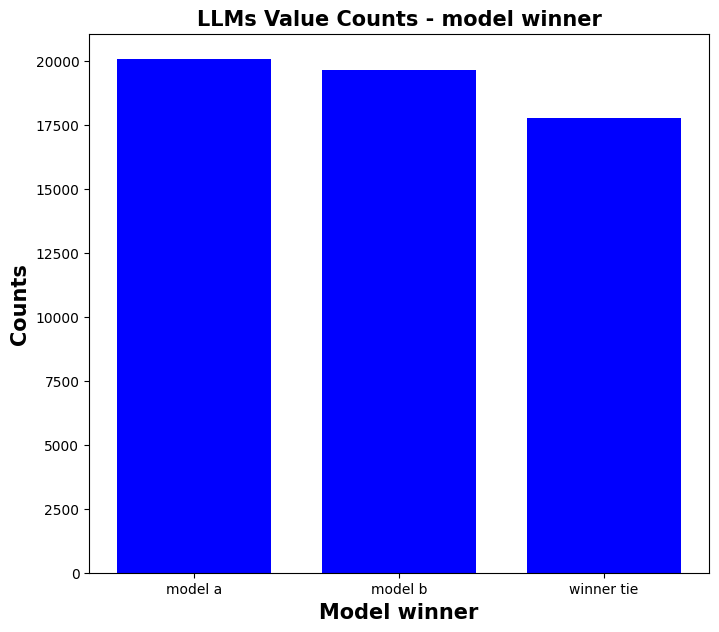

In [13]:
#barchart - model winner: winner model a, winner model b or winner tie
def which_winner(value):
    if  value["winner_model_a"] == 1:
         #winner model a
         value["winner_model_b"] = 0
         value["winner_tie"] = 0
         return 0
    elif value["winner_model_b"] == 1:
         #winner model b
         return 1
    elif value["winner_tie"] == 1:
         #winner tie
         return 2
    return None

training["winner"] = training.apply(which_winner, axis=1)

training["winner_model"] = training["winner"].astype(str)
training.loc[training["winner_model"] == "0", "winner_model"] = "model a"
training.loc[training["winner_model"] == "1", "winner_model"] = "model b"
training.loc[training["winner_model"] == "2", "winner_model"] = "winner tie"

result_model_winner = training["winner_model"].value_counts()
print("model winner:", result_model_winner)

print("-----")
print("Matplotlib barchart, model winner:")

barWidth = 0.75
plt.figure(figsize=(8, 7))

plt.bar(result_model_winner.index, result_model_winner.values, barWidth, color='b')

plt.ylabel('Counts', fontweight ='bold', fontsize = 15)
plt.xlabel('Model winner', fontweight ='bold', fontsize = 15)

plt.title('LLMs Value Counts - model winner', fontweight ='bold', fontsize = 15)


plt.show()

In [14]:
# 기존 코드에서 clean_text 함수까지 실행 후 이어집니다.
# --------------------------------------------------------------------------

import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from peft import PeftModel, LoraConfig, TaskType
from datasets import Dataset

# 💡 [필수 변수]
# NUM_LABELS는 승자 클래스 개수입니다: (0: model a, 1: model b, 2: winner tie)
NUM_LABELS = 3 
# DeBERTa 기본 모델 경로 (사전 학습 가중치)
BASE_MODEL_PATH = "/kaggle/input/deberta-v3-base-for-llm-comp/deberta-v3-base-local" 
# LoRA 어댑터 가중치 경로 (파인튜닝된 가벼운 가중치)
LORA_WEIGHTS_PATH = "/kaggle/input/deberta-lora-weight-2/deberta_lora_weights"

# ----------------------------------------------------
# 1. 데이터 프레임을 Hugging Face Dataset으로 변환 및 레이블 변환
# ----------------------------------------------------
# training DataFrame에서 필요한 열만 선택하여 Dataset 객체 생성
train_df = training.copy()
train_df["text"] = train_df["prompt"] + " [SEP] " + train_df["response_a"] + " [SEP] " + train_df["response_b"]
train_df["labels"] = train_df["winner"].astype(int)

hf_train_dataset = Dataset.from_pandas(train_df[['text', 'labels', 'id']])


# ----------------------------------------------------
# 2. 토크나이저 로드 및 데이터 토큰화
# ----------------------------------------------------
tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL_PATH)
MAX_LENGTH = 512 # DeBERTa-v3-base의 표준 길이

def tokenize_function(examples):
    # prompt, response_a, response_b를 하나의 긴 텍스트로 합쳐서 토큰화합니다.
    return tokenizer(examples["text"], truncation=True, max_length=MAX_LENGTH)

tokenized_train_dataset = hf_train_dataset.map(tokenize_function, batched=True, remove_columns=['text'])
tokenized_train_dataset.set_format("torch")

print("DeBERTa 데이터 토큰화 완료")

# ----------------------------------------------------
# 3. 모델 로드 (Base Model + LoRA Weights)
# ----------------------------------------------------

# 1. Base Model 로드 (사전 학습된 모델 본체)
base_model = AutoModelForSequenceClassification.from_pretrained(
    BASE_MODEL_PATH,
    num_labels=NUM_LABELS,
    ignore_mismatched_sizes=True 
)

# 2. LoRA 어댑터 주입 (PeftModel)
# LORA_WEIGHTS_PATH에 어댑터 가중치와 config 파일이 있어야 합니다.
model = PeftModel.from_pretrained(base_model, LORA_WEIGHTS_PATH)
model.eval() # 추론 모드로 설정

print("LoRA DeBERTa 모델 로드 및 추론 모드 설정 완료")

2025-11-03 01:32:32.555667: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762133552.736691      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762133552.789754      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:564: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte 

Map:   0%|          | 0/57477 [00:00<?, ? examples/s]

DeBERTa 데이터 토큰화 완료


Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at /kaggle/input/deberta-v3-base-for-llm-comp/deberta-v3-base-local and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/peft/config.py:165: UserWarning: Unexpected keyword arguments ['target_parameters'] for class LoraConfig, these are ignored. This probably means that you're loading a configuration file that was saved using a higher version of the library and additional parameters have been introduced since. It is highly recommended to upgrade the PEFT version before continuing (e.g. by running `pip install -U peft`).
  warnings.warn(


LoRA DeBERTa 모델 로드 및 추론 모드 설정 완료


In [15]:
from transformers import Trainer, TrainingArguments
import numpy as np
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["WANDB_DISABLED"] = "true"
DATALOADER_NUM_WORKERS = 0

# ----------------------------------------------------
# 1. Test 데이터 준비 및 토큰화
# ----------------------------------------------------
test_df = test.copy() 
# Test 데이터의 'prompt'와 'response'를 합친 후 토큰화합니다.
test_df["text"] = test_df["prompt"] + " [SEP] " + test_df["response_a"] + " [SEP] " + test_df["response_b"]

hf_test_dataset = Dataset.from_pandas(test_df[['text', 'id']])
tokenized_test_dataset = hf_test_dataset.map(tokenize_function, batched=True, remove_columns=['text'])
tokenized_test_dataset.set_format("torch")

# ----------------------------------------------------
# 2. Trainer를 사용한 추론 (Model Prediction)
# ----------------------------------------------------

# 추론을 위한 TrainingArguments (학습은 하지 않으므로 최소 설정만 사용)
# 추론 시에도 배치 크기는 메모리 제약에 따라 설정해야 합니다.

INFERENCE_BATCH_SIZE = 128
inference_args = TrainingArguments(
    output_dir="./deberta_inference_results",
    per_device_eval_batch_size=INFERENCE_BATCH_SIZE, 
    dataloader_num_workers=DATALOADER_NUM_WORKERS,    
    fp16=True, 
    # report_to="none"
)
model = model.to('cpu').eval()

trainer = Trainer(
    model=model,
    args=inference_args,
    tokenizer=tokenizer,
)

# 추론 실행 (predict_proba와 동일)
raw_predictions = trainer.predict(tokenized_test_dataset)

# 확률값 추출 (로짓(logits)을 softmax를 통해 확률로 변환)
logits = raw_predictions.predictions
probabilities = torch.nn.functional.softmax(torch.tensor(logits), dim=-1).numpy()

# ----------------------------------------------------
# 3. Submission 파일 생성
# ----------------------------------------------------
value_test_y_probabilities = probabilities # [:, 0] (model a), [:, 1] (model b), [:, 2] (winner tie)

print('Model winner prediction, probability', value_test_y_probabilities)

output = pd.DataFrame({
    'id': test_df.id.values,
    'winner_model_a': value_test_y_probabilities[:, 0],
    'winner_model_b': value_test_y_probabilities[:, 1],
    'winner_tie': value_test_y_probabilities[:, 2]
})

output.to_csv('submission.csv', index=False)

print("DeBERTa LoRA 추론 및 Submission 파일 생성 완료")

Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/tmp/ipykernel_19/970893520.py:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Model winner prediction, probability [[0.31184494 0.37110755 0.31704748]
 [0.33254457 0.34910244 0.31835303]
 [0.32939953 0.35194054 0.3186599 ]]
DeBERTa LoRA 추론 및 Submission 파일 생성 완료
